# Regularización Lasso para Predicción de Humedad/Temperatura
Este notebook implementa un modelo de regresión con regularización Lasso para predecir valores continuos, e incluye análisis de curvas de aprendizaje, validación, paridad, sesgo-varianza y explicaciones breves.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, validation_curve, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Cargar el dataset (ajusta la ruta si es necesario)
dataset = pd.read_csv('../dataset/ML1_temperature.xlsx - Hoja1.csv', decimal=',')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1:].values

In [3]:
# Separar en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

## Curva de aprendizaje
La curva de aprendizaje muestra cómo varía el error a medida que aumenta el tamaño del conjunto de entrenamiento.

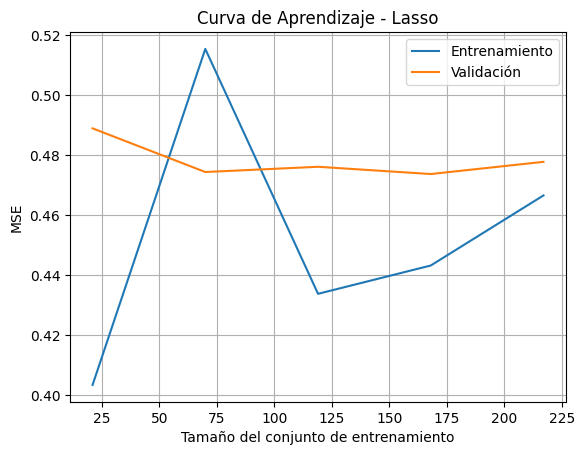

In [4]:
train_sizes, train_scores, val_scores = learning_curve(Lasso(alpha=1.0), x_train, y_train.ravel(), cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis=1)
val_scores_mean = -val_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, label='Entrenamiento')
plt.plot(train_sizes, val_scores_mean, label='Validación')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('MSE')
plt.title('Curva de Aprendizaje - Lasso')
plt.legend()
plt.grid(True)
plt.show()

## Curva de validación
La curva de validación muestra el desempeño del modelo para diferentes valores de alpha (parámetro de regularización).

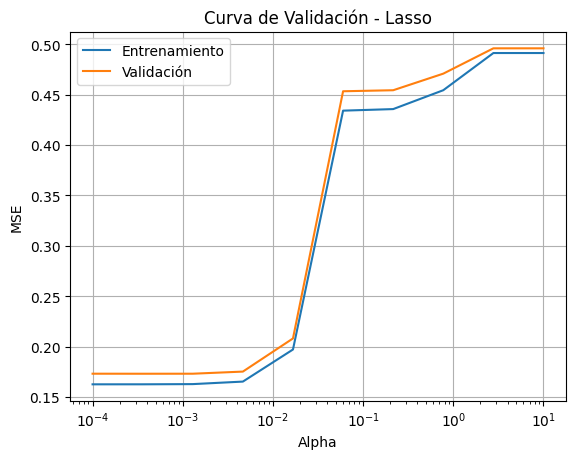

In [5]:
import numpy as np
alphas = np.logspace(-4, 1, 10)
train_scores, val_scores = validation_curve(Lasso(), x_train, y_train.ravel(), param_name='alpha', param_range=alphas, cv=5, scoring='neg_mean_squared_error')
plt.semilogx(alphas, -train_scores.mean(axis=1), label='Entrenamiento')
plt.semilogx(alphas, -val_scores.mean(axis=1), label='Validación')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Curva de Validación - Lasso')
plt.legend()
plt.grid(True)
plt.show()

## Curva de paridad
La curva de paridad compara las predicciones del modelo con los valores reales.

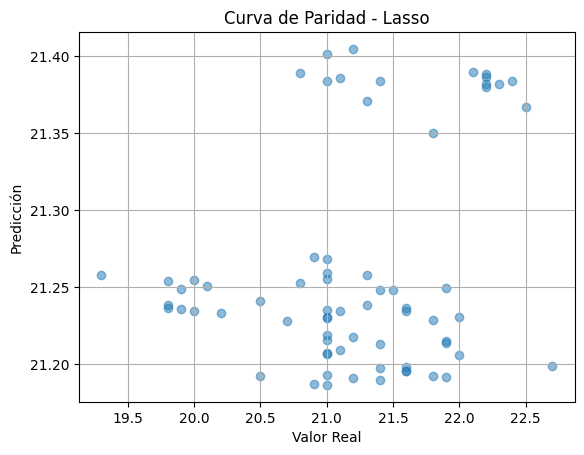

In [ ]:
# Curva de paridad mejorada: Temperatura Real vs Predicha (Entrenamiento y Validación)
plt.figure(figsize=(7,6))
plt.scatter(y_train, model.predict(x_train), alpha=0.7, label='Entrenamiento', color='cornflowerblue')
plt.scatter(y_val, y_val_pred, alpha=0.7, label='Validación', color='darkorange')
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label='Predicción perfecta')
plt.xlabel('Temperatura Real')
plt.ylabel('Temperatura Predicha')
plt.title(f'Temperatura Real vs Predicha\nMSE Validación = {mean_squared_error(y_val, y_val_pred):.3f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print(f'R^2 validación (Temperatura): {r2_score(y_val, y_val_pred):.3f}')

## Curva de sesgo y varianza
El sesgo y la varianza se pueden analizar observando la diferencia entre el error de entrenamiento y validación. Un sesgo alto implica bajo desempeño en ambos conjuntos, mientras que una varianza alta implica gran diferencia entre ambos errores.

In [7]:
print(f'MSE Entrenamiento: {mean_squared_error(y_train, model.predict(x_train))}')
print(f'MSE Validación: {mean_squared_error(y_val, y_val_pred)}')

MSE Entrenamiento: 0.4694428696528274
MSE Validación: 0.5198821604733213


## Explicación breve
Lasso es útil cuando se busca reducir la cantidad de variables (selección de variables) y controlar el sobreajuste. El compromiso sesgo-varianza se ajusta modificando el parámetro alpha.

In [ ]:
# Actual vs Predicho (Entrenamiento y Validación) - Lasso (Temperatura)
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Entrenamiento')
plt.scatter(y_val, y_val_pred, alpha=0.5, label='Validación')
plt.xlabel('Temperatura Real')
plt.ylabel('Temperatura Predicha')
plt.title('Actual vs Predicho - Lasso (Temperatura)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Serie temporal: valores reales vs predichos
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

plt.figure(figsize=(10,4))
plt.plot(range(len(y_val)), y_val, label='Real', color='royalblue', linewidth=2)
plt.plot(range(len(y_val_pred)), y_val_pred, label='Predicho', color='darkorange', linewidth=2)
plt.xlabel('Índice (tiempo)')
plt.ylabel('Variable objetivo')
plt.title(f'Serie temporal: Real vs Predicho (R²={r2_score(y_val, y_val_pred):.3f})')
plt.legend()
plt.tight_layout()
plt.show()